In [4]:
#(a)
# Import the data set
import numpy as np
import scipy.stats as sts

expenditure = np.loadtxt('clms.txt')
expenditure

array([ 361.65,  123.04,  541.77, ...,   97.43,  186.88,  119.19])

In [14]:
# Calculate the discriptive statistics
np.mean(expenditure), np.median(expenditure),np.max(expenditure), np.min(expenditure), np.std(expenditure)

(720.27797532724367, 172.21000000000001, 227967.25, 0.01, 3972.6637563936629)

<IPython.core.display.Javascript object>


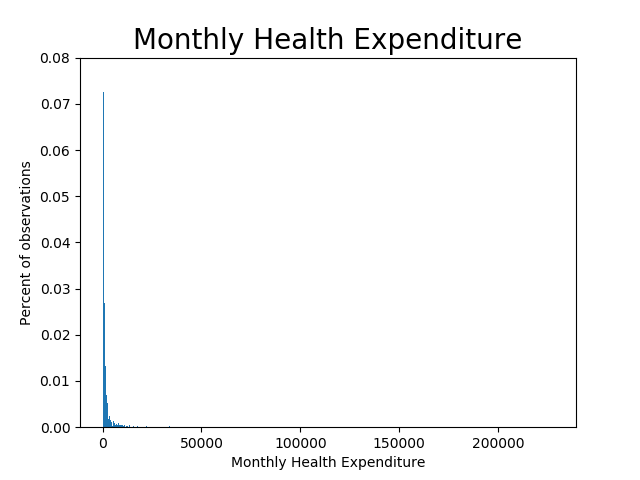

1.0


In [61]:
# Plot the monthly health expenditure data
import matplotlib.pyplot as plt
%matplotlib notebook
weights = (1 / expenditure.shape[0]) * np.ones_like(expenditure)
count, bin_cuts, patches = plt.hist(expenditure, 1000, weights = weights)
plt.title('Monthly Health Expenditure', fontsize=20)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percent of observations')
plt.ylim([0, 0.08])
print(count.sum())

In [54]:
# define a new data set which only includes expenditure <= 800
expenditure_800 = expenditure [expenditure <= 800]
expenditure_800

array([ 361.65,  123.04,  541.77, ...,   97.43,  186.88,  119.19])

<IPython.core.display.Javascript object>


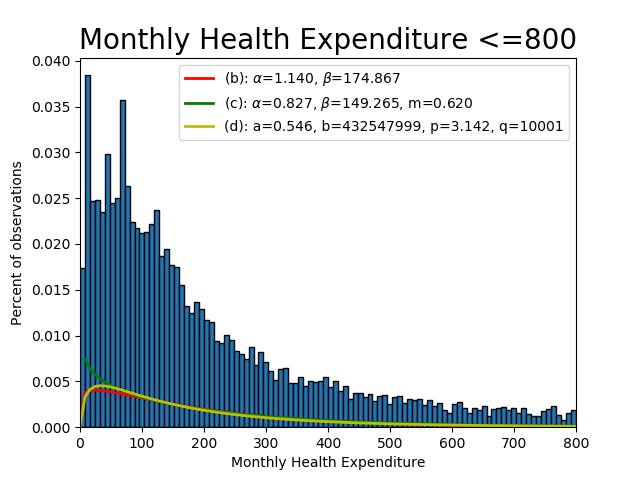

0.849420849421


In [231]:
# Plot the new data set and adjust the frequencies
weights2 = (1 / expenditure.shape[0]) * np.ones_like(expenditure_800)
count2, bin_cuts2, patches2 = plt.hist(expenditure_800, 100, weights = weights2, edgecolor='black')
plt.title('Monthly Health Expenditure <=800', fontsize=20)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percent of observations')
plt.xlim([0, 800])
print(count2.sum())

In [232]:
#(b)
# Define the gamma distribution
import scipy.special as spc
def gamma_pdf(xvals, alpha, beta):
    pdf_vals = (xvals ** (alpha -1)) * (np.exp(-xvals/beta)) * (beta ** -alpha) / (spc.gamma(alpha))
    return pdf_vals
# Set the initial values for parameters
beta_0 = np.var(expenditure_800) / np.mean(expenditure_800)
alpha_0 = np.mean(expenditure_800) / beta_0
print('alpha_0=', alpha_0, 'beta_0=', beta_0)

alpha_0= 1.18831402854 beta_0= 167.723283979


In [233]:
# Define log likelihood function for the gamma distribution
def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

In [234]:
# Define the criterion function
def crit(params, args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [235]:
# Set the domain of the parametes
bounds = ((1e-10, None), (1e-10, None))
# Construct the minimization problem
import scipy.optimize as opt
params_init = np.array([alpha_0, beta_0])
results = opt.minimize(crit, params_init, args=expenditure_800, bounds = bounds, method = 'L-BFGS-B')
alpha_MLE, beta_MLE = results.x
print('alpha_MLE=', alpha_MLE, ' beta_MLE=', beta_MLE, 'maximized_log_likelihood=', log_lik_gamma(expenditure_800, alpha_MLE, beta_MLE))

alpha_MLE= 1.13976691235  beta_MLE= 174.866836155 maximized_log_likelihood= -56732.5986796


In [236]:
# Plot the estimated gamma distribution
dist_expenditure_800 = np.linspace(0, 800, 100)
plt.plot(dist_expenditure_800, gamma_pdf(dist_expenditure_800, alpha_MLE, beta_MLE),
         linewidth=2, color='r', label = r'(b): $\alpha$=1.140, $\beta$=174.867')
plt.legend(loc='upper right')

In [237]:
#(c)
# Define the generalized gamma distribution
def ggamma_pdf(xvals, alpha, beta, m):
    pdf_vals = m*xvals**(alpha-1) * (np.exp(-(xvals/beta))**m)/(spc.gamma(alpha/m)*beta**alpha)
    return pdf_vals

In [238]:
# Define log likelihood function for the generalized gamma distribution
def log_lik_ggamma(xvals, alpha, beta, m):
    pdf_vals = ggamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

In [239]:
# Define the criterion function
def crit_gg(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_ggamma(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [240]:
# Set the domaian of the parametes
bounds_gg = ((1e-10, None), (1e-10, None), (1e-10, None))
# Construct the minimization problem
m_0 = 0.999
params_init_gg = np.array([alpha_MLE, beta_MLE, m_0])
results_gg = opt.minimize(crit_gg, params_init_gg, args=expenditure_800, bounds = bounds_gg, method = 'L-BFGS-B')
alpha_MLE_gg, beta_MLE_gg, m_MLE_gg = results_gg.x
print('alpha_MLE_GG=', alpha_MLE_gg, ' beta_MLE_GG=', beta_MLE_gg, 'm_MLE_GG=', m_MLE_gg, 'maximized_log_likelihood_GG=', log_lik_ggamma(expenditure_800, alpha_MLE_gg, beta_MLE_gg, m_MLE_gg))

alpha_MLE_GG= 0.826528658566  beta_MLE_GG= 149.264584308 m_MLE_GG= 0.618997875459 maximized_log_likelihood_GG= -55581.6654468


In [241]:
# Plot the estimated generalized gamma distribution
plt.plot(dist_expenditure_800, ggamma_pdf(dist_expenditure_800, alpha_MLE_gg, beta_MLE_gg, m_MLE_gg),
         linewidth=2, color='g', label = r'(c): $\alpha$=0.827, $\beta$=149.265, m=0.620')
plt.legend(loc='upper right')

/Users/nobuyukifuruta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


In [242]:
#(d)
# Define the generalized beta 2 distribution
import scipy.integrate as intg
def gbeta2_pdf(xvals, a, b, p,q):
    pdf_vals = a * (xvals ** (a*p -1)) * (b ** (-a*p)) / (((1+(xvals/b)**a)**(p+q)) * (spc.beta(p,q)))
    return pdf_vals

In [243]:
# Define log likelihood function for the generalized beta 2 distribution
def log_lik_gbeta2(xvals, a, b, p,q):
    pdf_vals = gbeta2_pdf(xvals, a, b, p,q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

In [244]:
# Define the criterion function
def crit(params, args):
    a, b, p,q = params
    xvals = args
    log_lik_val = log_lik_gbeta2(xvals, a, b, p,q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [245]:
# Set the initial values and boundaries of parameters
a_init = m_MLE_gg
q_init = 10000
b_init = ((q_init)**(1/(m_MLE_gg)))*(beta_MLE_gg)
p_init = (alpha_MLE_gg) / m_MLE_gg
params_init = np.array([a_init, b_init, p_init, q_init])
bounds = ((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None))

## Construct the minimization problem
results_gb2 = opt.minimize(crit, params_init, args=expenditure_800, bounds = bounds, method = 'L-BFGS-B')
a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2 = results_gb2.x
print('a_MLE_GB2=', a_MLE_gb2, ' b_MLE_GB2=', b_MLE_gb2, 'p_MLE_GB2=', p_MLE_gb2, 'q_MLE_GB2=', q_MLE_gb2, 'maximized_log_likelihood_GB2=', log_lik_gbeta2(expenditure_800, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2))

a_MLE_GB2= 0.545045409007  b_MLE_GB2= 432528268.017 p_MLE_GB2= 3.16725263428 q_MLE_GB2= 9999.89896562 maximized_log_likelihood_GB2= -56800.0038081


In [246]:
# Plot the estimated generalized gamma distribution
plt.plot(dist_expenditure_800, gbeta2_pdf(dist_expenditure_800, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2),
         linewidth=2, color='y', label = r'(d): a=0.546, b=432547999, p=3.142, q=10001')
plt.legend(loc='upper right')

In [248]:
# (e)
# Compute the test statistics for the log likelihood ratio test
LR_g = 2*(log_lik_gbeta2(expenditure_800, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2)-log_lik_gamma(expenditure_800, alpha_MLE, beta_MLE))
LR_gg = 2*(log_lik_gbeta2(expenditure_800, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2)-log_lik_ggamma(expenditure_800, alpha_MLE_gg, beta_MLE_gg, m_MLE_gg))
print('LR_g=', LR_g, 'LR_gg', LR_gg)

LR_g= -134.810257032 LR_gg -2436.67672271


In [250]:
# Compute the p-values
pval_g = 1.0 - sts.chi2.cdf(LR_g, 4)
pval_gg = 1.0 - sts.chi2.cdf(LR_gg, 4)
print('p-value of LR_g= ', pval_g, 'p-value of LG_gg=', pval_gg)

p-value of LR_g=  1.0 p-value of LG_gg= 1.0


In [252]:
# (f)
# Compute the probability of having a monthly health care claim of more than $1,000
pr_gb2 = 1- intg.quad(lambda x: gbeta2_pdf(x, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2), 0, 1000)[0]
pr_g = 1- intg.quad(lambda x: gamma_pdf(x, alpha_MLE, beta_MLE), 0, 1000)[0]
print ('probability using GB2 dist', pr_gb2, 'probability using Gamma dist', pr_g)

probability using GB2 dist 0.01182126643710546 probability using Gamma dist 0.00457132368760782
